<a href="https://colab.research.google.com/github/M011190B/test_colaboratory/blob/master/TP_size_distributions_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook the fits and the resulting changes of PTI deviations are corrected and replotted

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import widgets
from scipy import optimize as opt

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# os.chdir('/content/drive/My Drive/UNI/DiTest_TP_measurements/vehicle_data_frames')
data = pd.read_pickle('/content/drive/My Drive/UNI/DiTest_TP_measurements/vehicle_data_frames/vehicle_measurement_data.pkl')
# drop invalid data points
data = data[data.mp_ok ==1]

# fitting SMSP data

In [0]:
plt.style.use('dark_background')

In [0]:
# os.chdir('/content/drive/My Drive/UNI/DiTest_TP_measurements/vehicle_measurements')
n_modes_df = pd.read_csv('/content/drive/My Drive/UNI/DiTest_TP_measurements/vehicle_measurements/number_of_modes.csv')
n_modes_df.set_index('measurement_number', inplace = True)

In [0]:
def plot_smps_scans(data,n):
    df = data.smps_data[n]
    plt.plot(data.smps_dp[n],data.smps_dNdlogdp_mean[n],label = 'mean')
    for k in range(len(df)):
        plt.plot(df.dp.iloc[k],df.dNdlogdp.iloc[k],label = 'scan # %i'%(df.index[k]))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('d_p / nm')
    plt.ylabel('dNdlogdp')
    plt.legend()
    plt.title('measurement '+str(n)+': ' +data.description[n])

In [0]:
# definition of lognorm distribution for logarithmically spaced bin centers/widths.
def lognorm_log_1(dp,GMD,GSD,a):
    return a/np.sqrt(2*np.pi)/np.log(GSD)*np.exp(-1*(np.log(dp)-np.log(GMD))**2/(2*np.log(GSD)**2))

def lognorm_log_2(dp,mu1,sigma1,a1,mu2,sigma2,a2):
    return lognorm_log_1(dp,mu1,sigma1,a1)+lognorm_log_1(dp,mu2,sigma2,a2)

def lognorm_log_n(dp,params):
    dN = np.zeros_like(dp)
    for p in params:
        dN+= lognorm_1(dp,*p)
    return dN
        

In [0]:
instrument_colors = {'apc': 'tab:blue',
                     'dc_sn008':'tab:orange',
                     'dc_sn010': 'tab:red',
                     'dc_2sm': 'tab:cyan',
                     'smps': 'tab:purple',
                     'eeps':'tab:olive'}
instrument_names =  {'apc': 'AVL APC',
                     'dc_sn008':'DC w/o ET',
                     'dc_sn010': 'DC w/ ET',
                     'dc_2sm': 'DC 2 Stage',
                     'smps': 'SMPS',
                     'eeps':'EEPS'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

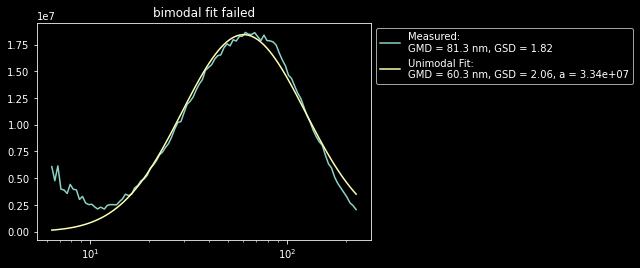

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

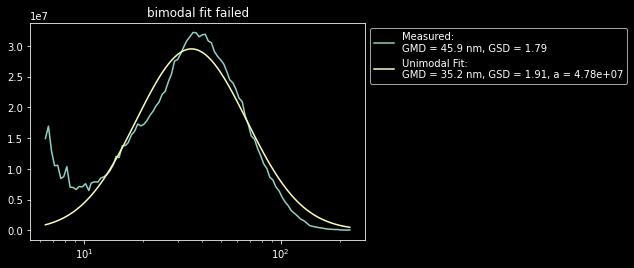

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

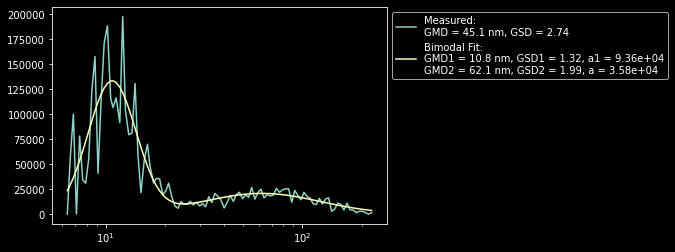

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

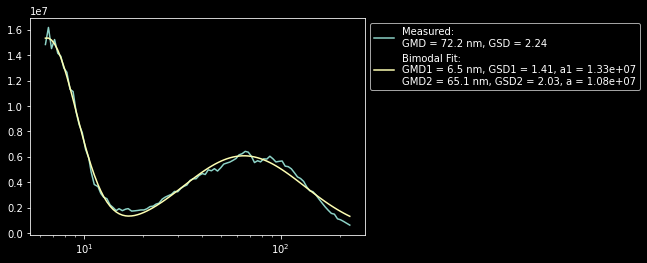

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

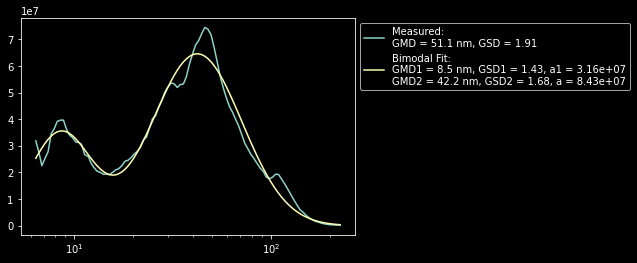

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

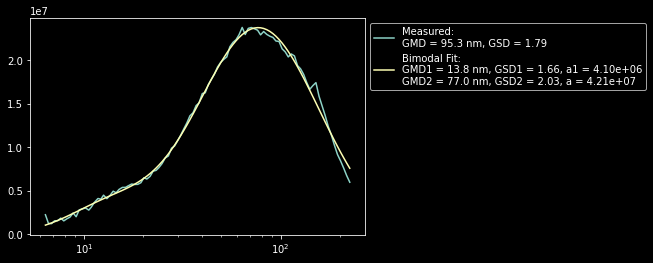

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

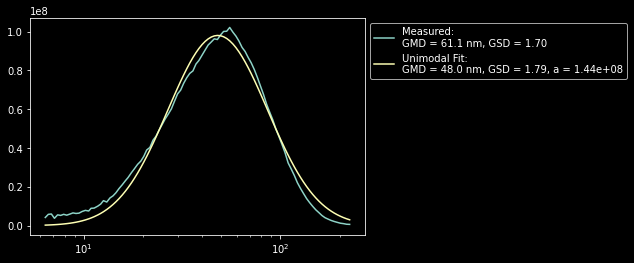

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

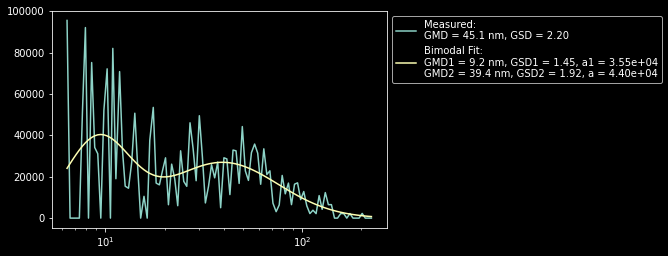

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

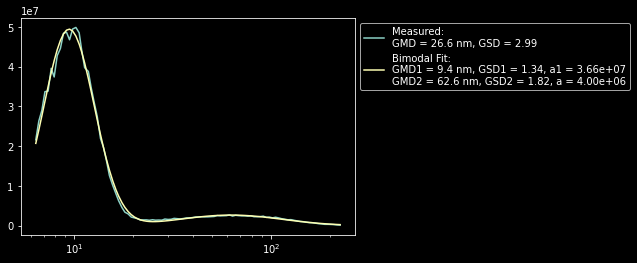

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

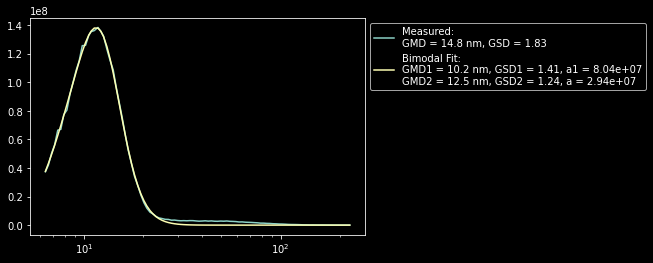

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

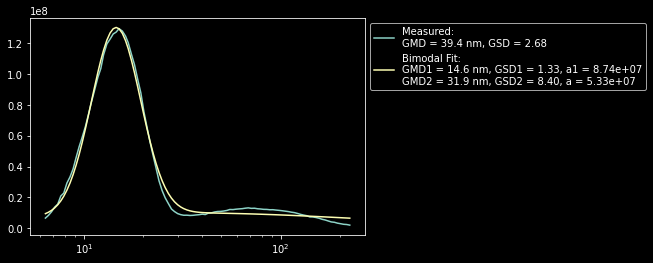

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

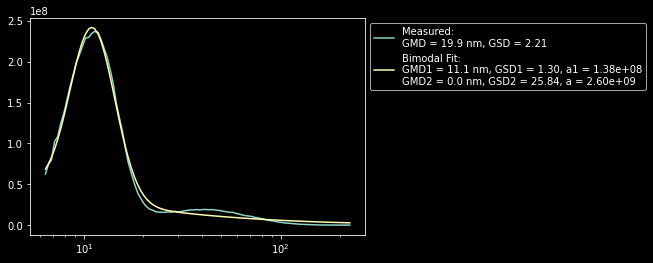

<IPython.core.display.Javascript object>

In [0]:
valid_sd = data.index[~np.isnan(n_modes_df.n_modes)]

tb = widgets.TabBar([str(n) for n in valid_sd])
popt_list = []
for n in valid_sd:
    if n_modes_df.n_modes[n] ==1:
        ydata = data.smps_dNdlogdp_mean[n]
        xdata = data.smps_dp[n]
        [popt,pcov]= opt.curve_fit(lognorm_log_1,xdata,ydata,p0 = [data.smps_GMD[n],data.smps_GSD[n],data.smps_c_mean[n]])
        with tb.output_to(str(n), select=(n < 3)):
            plt.semilogx(data.smps_dp[n],data.smps_dNdlogdp_mean[n],label = 'Measured:\nGMD = %.1f nm, GSD = %.2f' %(data.smps_GMD[n],data.smps_GSD[n]))
            plt.semilogx(data.smps_dp[n],lognorm_log_1(data.smps_dp[n],*popt),label = 'Unimodal Fit:\nGMD = %.1f nm, GSD = %.2f, a = %.2e' %(popt[0],popt[1],popt[2]))
            plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
    if n_modes_df.n_modes[n] ==2:
        ydata = data.smps_dNdlogdp_mean[n]
        xdata = data.smps_dp[n]
        try: 
            [popt,pcov]= opt.curve_fit(lognorm_log_2,xdata,ydata,p0 = [15,data.smps_GSD[n],data.smps_c_mean[n]/2,data.smps_GMD[n]+10,data.smps_GSD[n],data.smps_c_mean[n]/2])
            with tb.output_to(str(n), select=(n < 3)):
                plt.semilogx(data.smps_dp[n],data.smps_dNdlogdp_mean[n],label = 'Measured:\nGMD = %.1f nm, GSD = %.2f' %(data.smps_GMD[n],data.smps_GSD[n]))
                plt.semilogx(data.smps_dp[n],lognorm_log_2(data.smps_dp[n],*popt),label = 'Bimodal Fit:\nGMD1 = %.1f nm, GSD1 = %.2f, a1 = %.2e\nGMD2 = %.1f nm, GSD2 = %.2f, a = %.2e' %(popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))
                plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
        except:
            try:
                [popt,pcov]= opt.curve_fit(lognorm_log_1,xdata,ydata,p0 = [data.smps_GMD[n],data.smps_GSD[n],data.smps_c_mean[n]])
                with tb.output_to(str(n), select=(n < 3)):
                    plt.semilogx(data.smps_dp[n],data.smps_dNdlogdp_mean[n],label = 'Measured:\nGMD = %.1f nm, GSD = %.2f' %(data.smps_GMD[n],data.smps_GSD[n]))
                    plt.semilogx(data.smps_dp[n],lognorm_log_1(data.smps_dp[n],*popt),label = 'Unimodal Fit:\nGMD = %.1f nm, GSD = %.2f, a = %.2e' %(popt[0],popt[1],popt[2]))
                    plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
                    plt.title('bimodal fit failed')
            except:
                with tb.output_to(str(n), select=(n < 3)):
                    plt.semilogx(data.smps_dp[n],data.smps_dNdlogdp_mean[n],label = 'Measured:\nGMD = %.1f nm, GSD = %.2f' %(data.smps_GMD[n],data.smps_GSD[n]))
                    plt.title('bimodal and unimodal fit failed')
    popt_list.append(popt)

In [0]:
popt_2 = {2:  [5,1.6,7e6,60.3,2.06, 3.3e+07], #check 1
          3:  [5,1.5,1.5e7,35.2, 1.91, 4.78e+07], #check 1
          5:  [10.8, 1.31, 9.35e4,62.1,1.99, 3.58e4], #check 1
          14: [6.5,1.41,1.33e7,65.1, 2.03, 1.08e7], #check 1
          15: [8.5,1.43,3.16e7,42.2,1.68, 8.43e7],#check 1
          16: [13.8,1.66,4.1e6,77,2.03,4.21e7], #check1
          17: [1,2, 0,48,1.79,1.44e8], #check1
          36: [9.2,1.45,3.55e4,39.4,1.92,4.4e4], #check1
          41: [9.4,1.34,3.66e7,62.6, 1.82, 4e6], #check example plot candidate because of beauty
          42: [11.3,1.35,1.05e8,48 ,1.60, 3.3e+6], #check 1
          43: [15,1.33, 9.2e7,70,1.82, 2e7], #check 1
          44: [11.1,1.3, 1.55e+08,40,1.62, 2.2e7]} #check  1   

In [0]:
# for making plot
plt.style.use('default')
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [0]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Log-Log


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Log-Lin


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

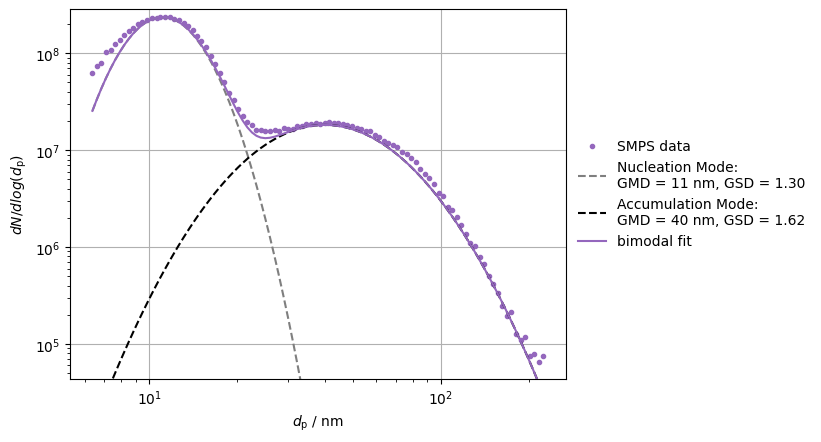

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

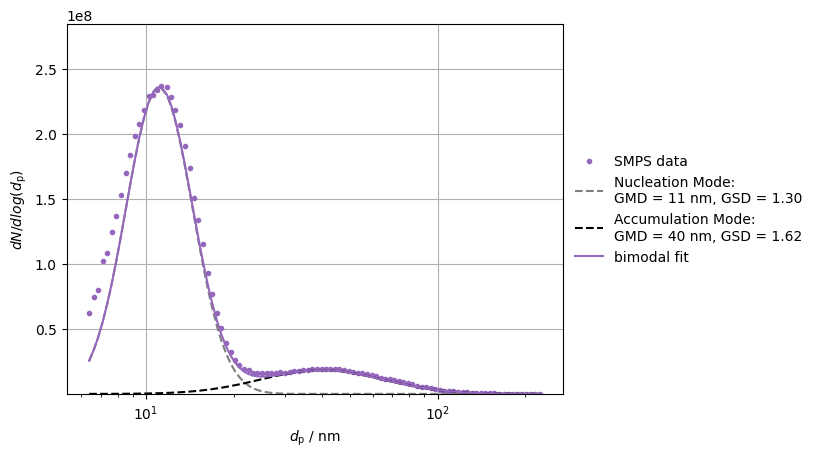

<IPython.core.display.Javascript object>

In [0]:
n = 44
grid = widgets.Grid(2, 2,header_row=True,)
with grid.output_to(0, 0):
  print('Log-Log')
with grid.output_to(0, 1):
  print('Log-Lin')
popt =popt_2[n]
GMD1 = popt[0]
GSD1 = popt[1]
GMD2 = popt[3]
GSD2 = popt[4]
ydata = data.smps_dNdlogdp_mean[n]
xdata = data.smps_dp[n]
y_scales = ['log','linear']

for k in range(len(y_scales)):
    with grid.output_to(1,k):
        plt.plot(xdata,ydata,'.',label = 'SMPS data',color = instrument_colors['smps'])
        plt.plot(xdata,lognorm_log_1(xdata,*popt[:3]),'--',label ='Nucleation Mode:\nGMD = %.0f nm, GSD = %.2f'%(GMD1,GSD1),color = 'tab:gray')
        plt.plot(xdata,lognorm_log_1(xdata,*popt[3:]),'--',label ='Accumulation Mode:\nGMD = %.0f nm, GSD = %.2f'%(GMD2,GSD2),color = 'black')
        plt.plot(xdata, lognorm_log_2(xdata,*popt),label = 'bimodal fit',color=instrument_colors['smps'],linestyle = '-')
        plt.ylim([min(ydata)/1.5,max(ydata*1.2)])
        plt.xscale('log')
        plt.yscale(y_scales[k])
        plt.legend(bbox_to_anchor=(1, 0.5),loc='center left', framealpha = 0,ncol = 1)
        # plt.title('Vehicle '+str(data.vehicle_id[n])+': ' +data.manufacturer[n]+ ' ' +data.model[n])
        plt.xlabel('$d_{\mathrm{p}}$ / nm')
        plt.ylabel('$dN / dlog(d_{\mathrm{p}})$')
        plt.grid()
        if k ==0:
            # os.chdir('/content/drive/My Drive/UNI/DiTest_TP_measurements/Plots')
            # plt.savefig('eample_plot_corrected.pdf')

In [0]:
# make table for document
data.smps_c_mean[5]

54657.060900000004

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
column_names = ['GMD_nuc','GSD_nuc','c_nuc','GMD_acc','GSD_acc','c_acc']

df4doc = pd.DataFrame.from_dict(popt_2,orient ='index',columns=column_names)

In [0]:
df4doc['v_ID']= data.vehicle_id[df4doc.index]

In [0]:
df4doc['mode_bool']=data.loc[df4doc.index,'mode']

In [0]:
operation_modes = ['low idle','high idle']

In [0]:
df4doc['operation'] = df4doc.mode_bool.apply(lambda x :operation_modes[x]) 

In [0]:
df4doc['c_tot'] = pd.to_numeric(data.smps_c_mean[df4doc.index])

In [0]:
vehicle_data= pd.read_pickle('/content/drive/My Drive/UNI/DiTest_TP_measurements/vehicle_data_frames/vehicle_data.pkl')

In [0]:
df4doc['vehicle_name'] = df4doc.v_ID.apply(lambda x:vehicle_data.loc[x,'manufacturer']+' '+vehicle_data.loc[x,'model'])

In [0]:
df4doc.loc[5,'vehicle_name']= 'Experimental Vehicle'

In [0]:
df4doc = df4doc[df4doc.GMD_nuc.notnull() ]

In [0]:
df4doc.loc[(41,42),'vehicle_name'] = 'VW Polo (DPF removed)'

In [0]:
#df4doc.loc[17,('GMD_nuc','GSD_nuc')]=1

In [0]:
columns4doc = ['v_ID','vehicle_name','operation','GMD_nuc','GSD_nuc','GMD_acc','GSD_acc','c_tot']
def fID(x):
    return '%.i'%(x)

def fGMD(x):
    return '%.0f'%(x)

def fGSD(x):
    return '%.2f'%(x)

def fctot(x):
    return '%.1e'%(x)

formatters = {'v_ID': fID,
              'GMD_nuc':fGMD,
              'GMD_acc':fGMD,
              'GSD_nuc':fGSD,
              'GSD_acc':fGSD,
              'c_tot':fctot}
print(df4doc.to_latex(columns = columns4doc,na_rep ='-',formatters = formatters,index = False,))

\begin{tabular}{rllrrrrr}
\toprule
v\_ID &           vehicle\_name &  operation & GMD\_nuc & GSD\_nuc & GMD\_acc & GSD\_acc &   c\_tot \\
\midrule
   1 &       Hyundai Terracan &   low idle &       5 &    1.60 &      60 &    2.06 & 1.5e+07 \\
   1 &       Hyundai Terracan &  high idle &       5 &    1.50 &      35 &    1.91 & 2.1e+07 \\
   2 &   Experimental Vehicle &   low idle &      11 &    1.31 &      62 &    1.99 & 5.5e+04 \\
   6 &             VW Lupo 3L &   low idle &       6 &    1.41 &      65 &    2.03 & 7.6e+06 \\
   6 &             VW Lupo 3L &  high idle &       8 &    1.43 &      42 &    1.68 & 4.8e+07 \\
   7 &     Mercedes-Benz C200 &   low idle &      14 &    1.66 &      77 &    2.03 & 1.9e+07 \\
   7 &     Mercedes-Benz C200 &  high idle &       1 &    2.00 &      48 &    1.79 & 6.3e+07 \\
  16 &        Mahindra XUV500 &  high idle &       9 &    1.45 &      39 &    1.92 & 3.2e+04 \\
  19 &  VW Polo (DPF removed) &   low idle &       9 &    1.34 &      63 &    1.82 & 

# Palas plots

In [0]:
data = pd.read_pickle('/content/drive/My Drive/UNI/DiTest_TP_measurements/palas_data_frames/instrument_comparison_data.pkl')

In [0]:
instrument_colors = {'apc': 'tab:blue',
                     'dc_sn008':'tab:orange',
                     'dc_sn010': 'tab:red',
                     'dc_2sm': 'tab:cyan',
                     'smps': 'tab:purple',
                     'eeps':'tab:olive'}
instrument_names =  {'apc': 'AVL APC',
                     'dc_sn008':'DC w/o ET',
                     'dc_sn010': 'DC w/ ET',
                     'dc_2sm': 'DC 2 Stage',
                     'smps': 'SMPS',
                     'eeps':'EEPS'}

In [0]:
def lognorm_log_1(dp,GMD,GSD,a):
    return a/np.sqrt(2*np.pi)/np.log(GSD)*np.exp(-1*(np.log(dp)-np.log(GMD))**2/(2*np.log(GSD)**2))

In [0]:
def calc_gmd(x,y):
    return np.exp(np.sum(y*np.log(x))/np.sum(y))

,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Size distributions


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GMD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GSD


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

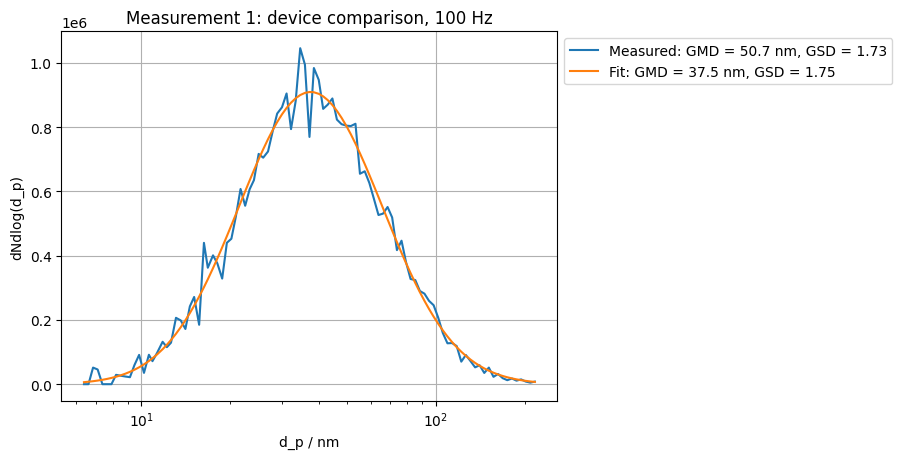

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

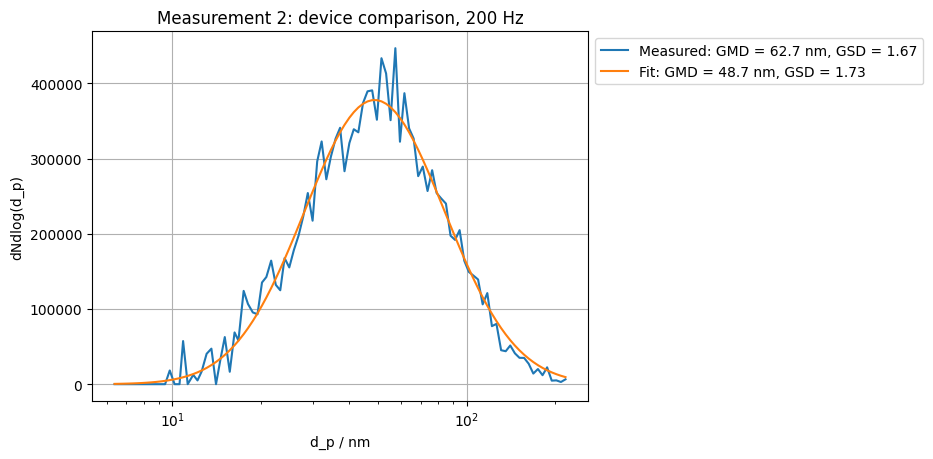

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

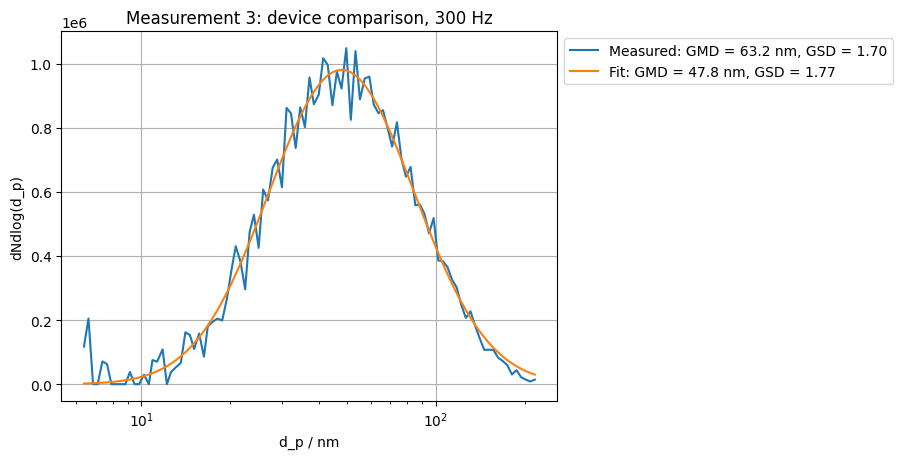

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

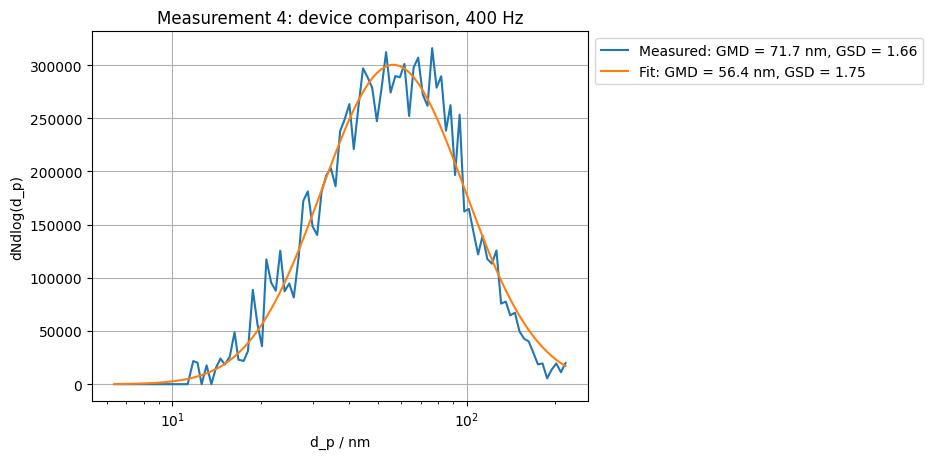

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

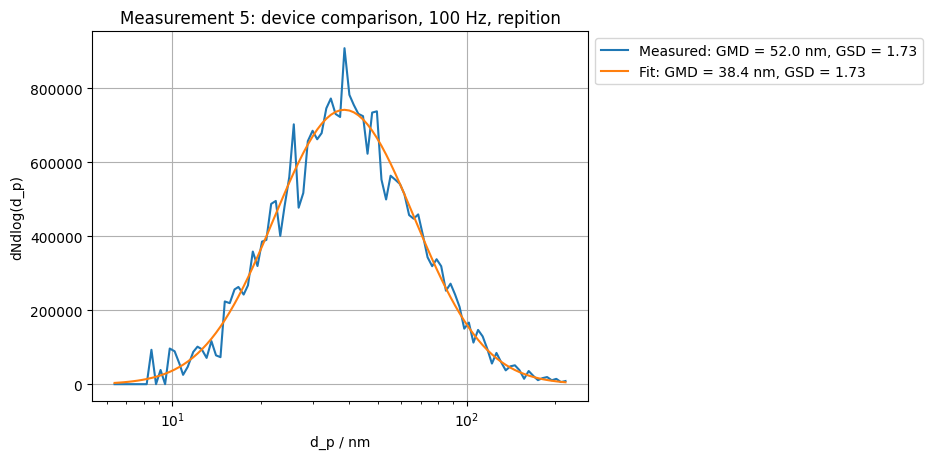

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

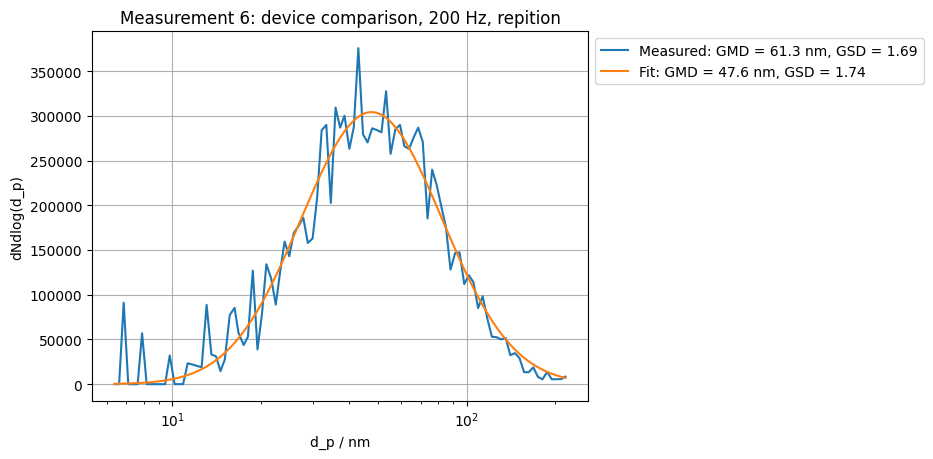

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

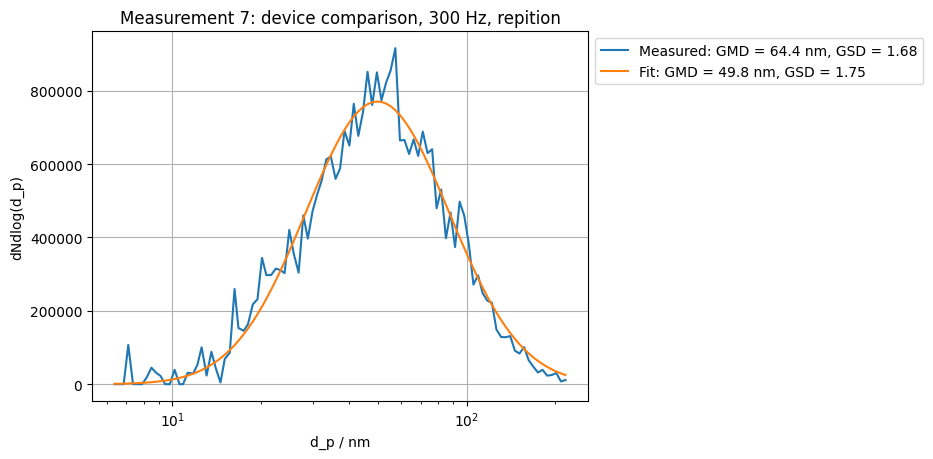

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

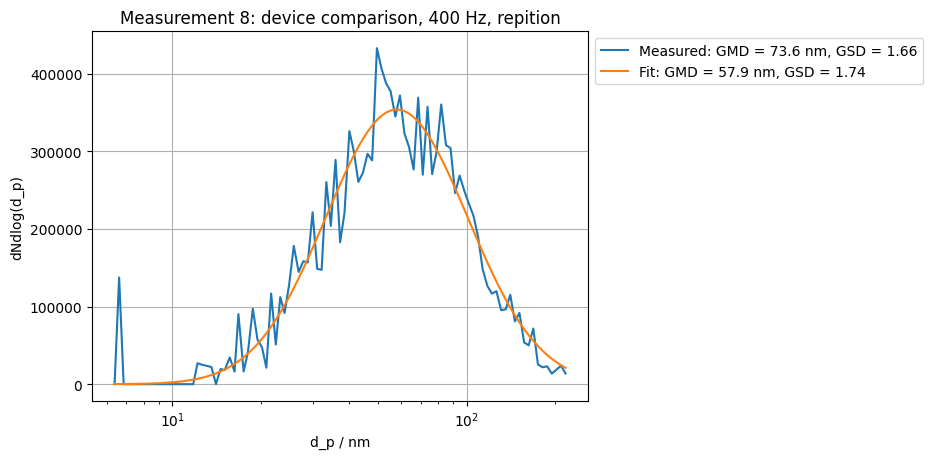

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

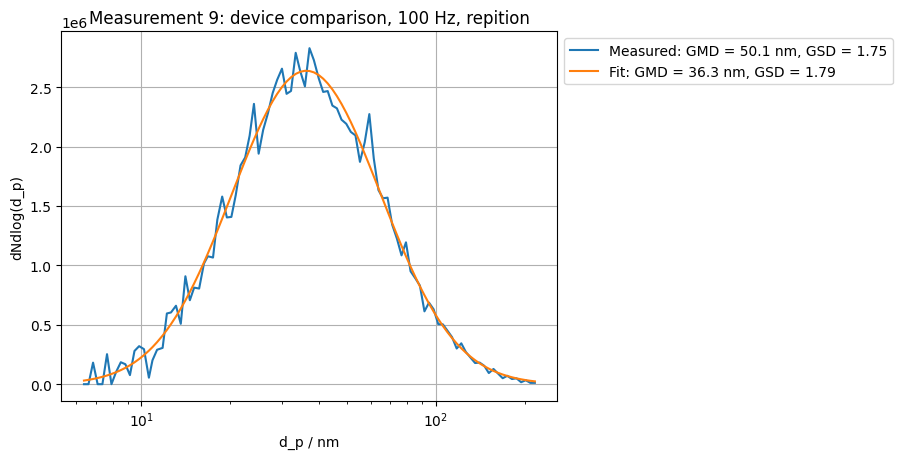

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

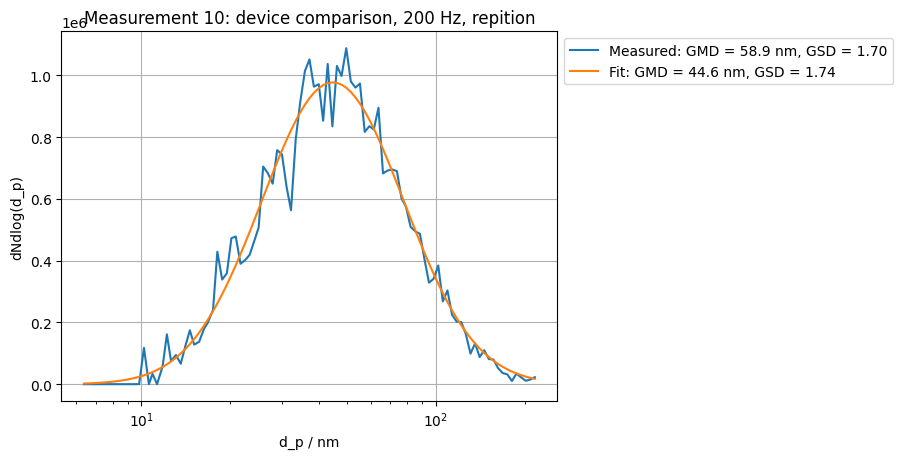

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

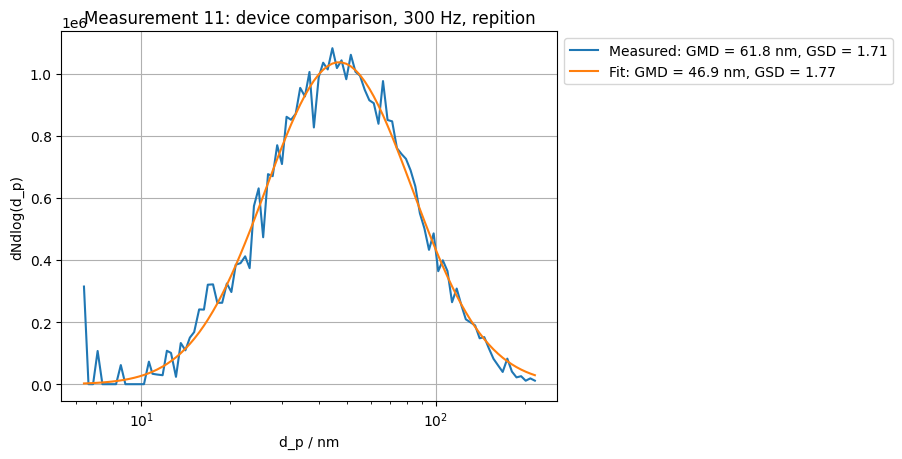

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

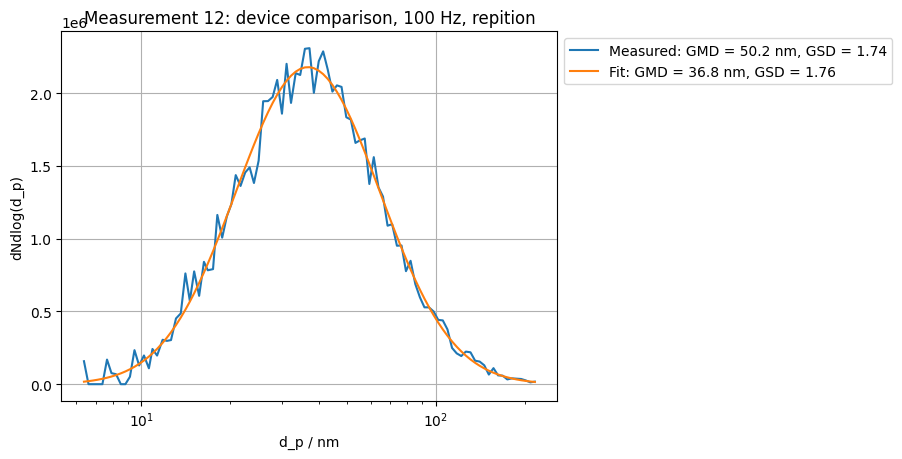

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

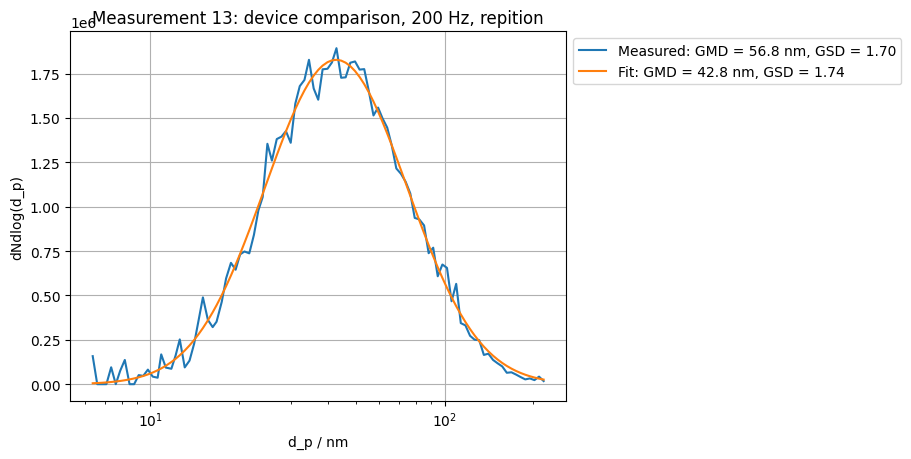

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

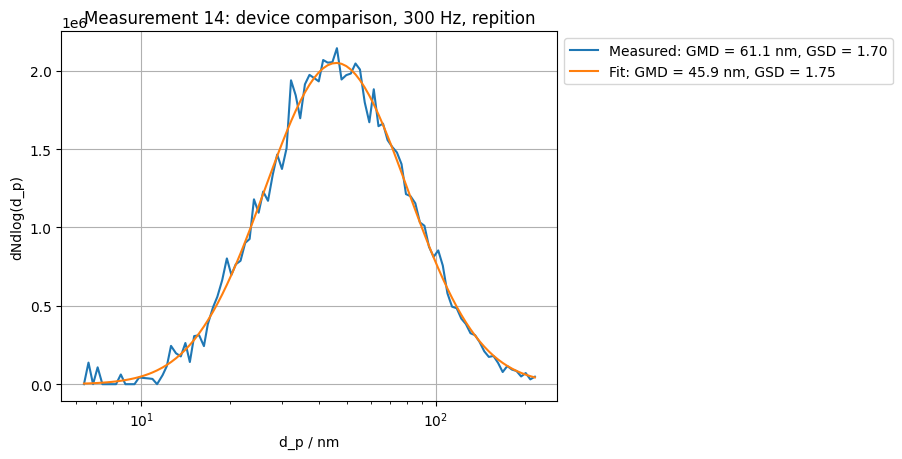

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

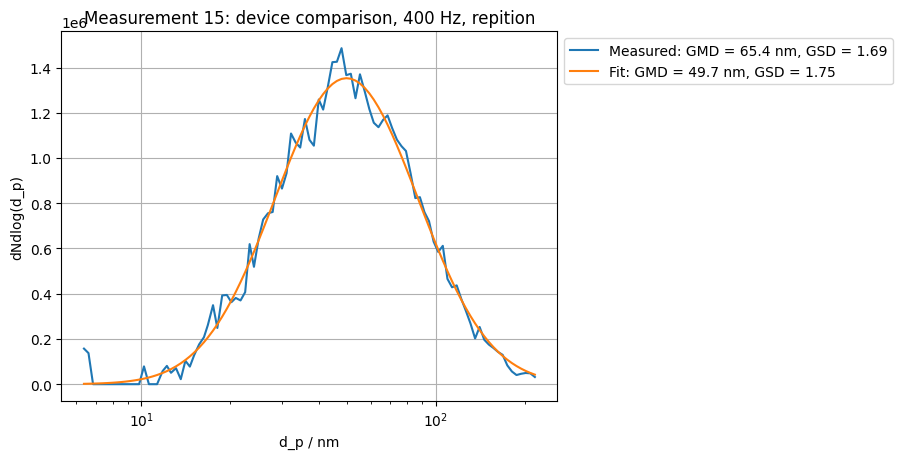

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

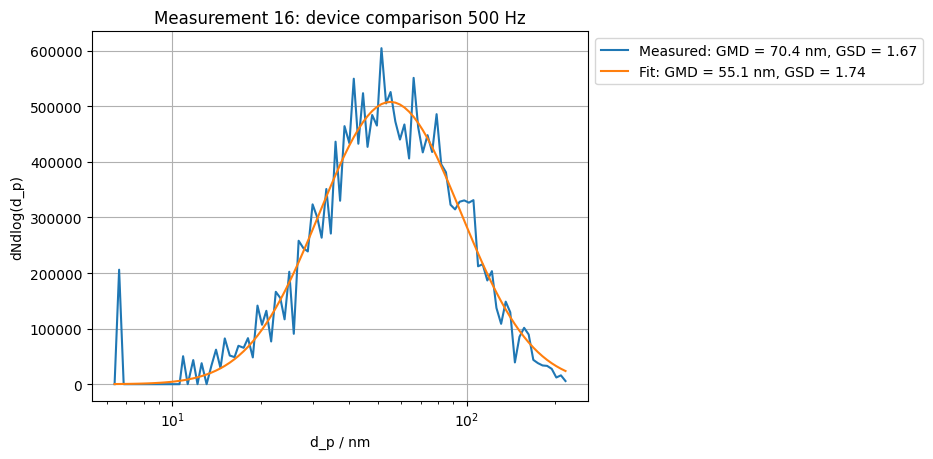

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

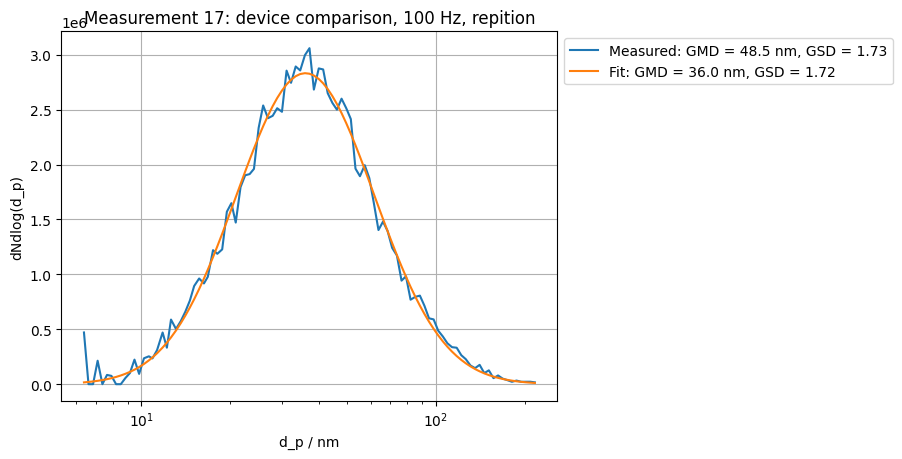

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

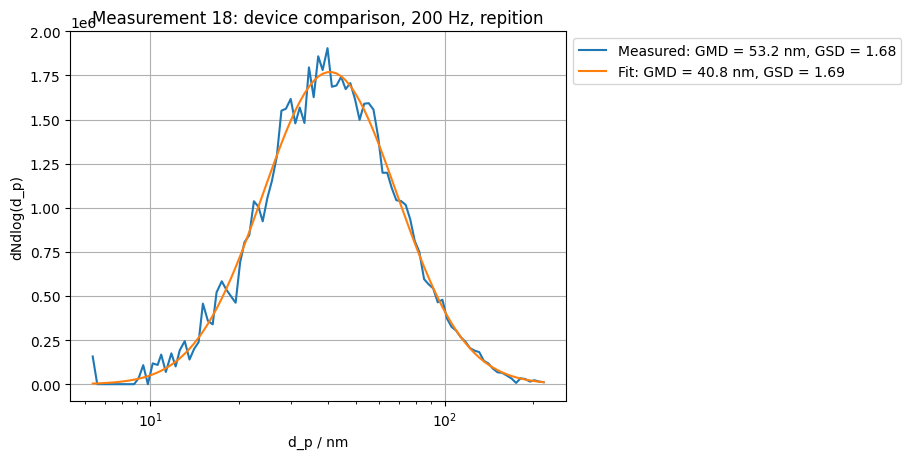

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

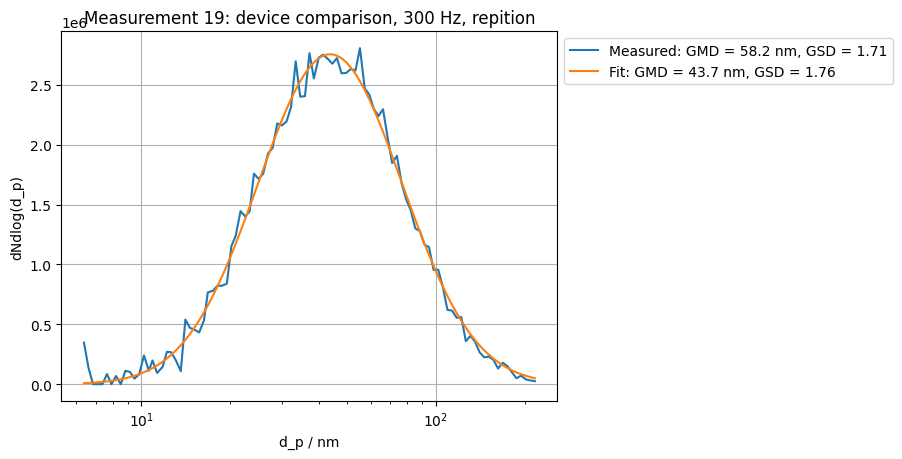

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

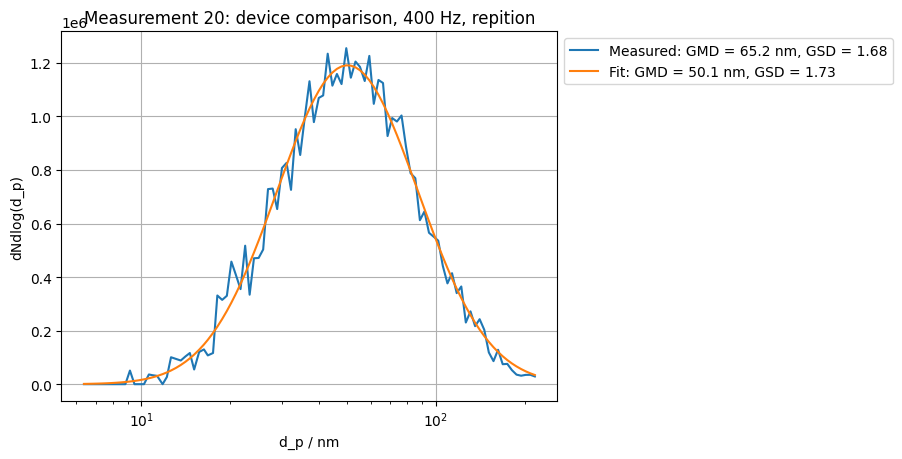

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

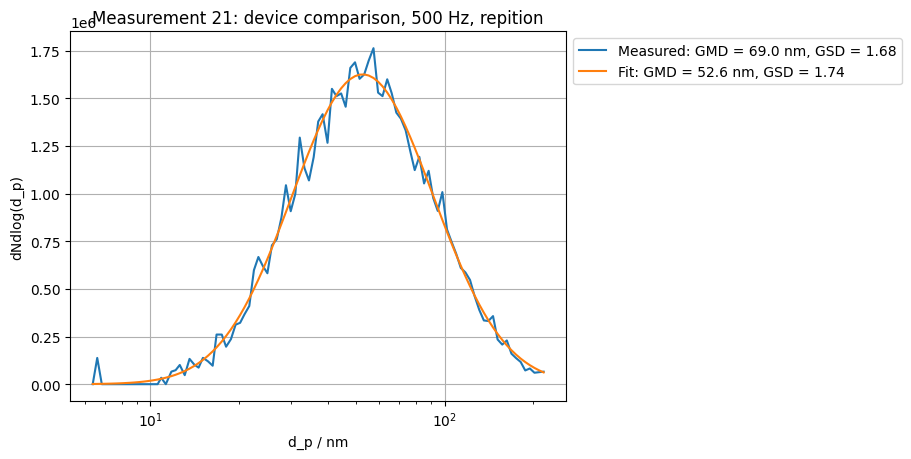

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

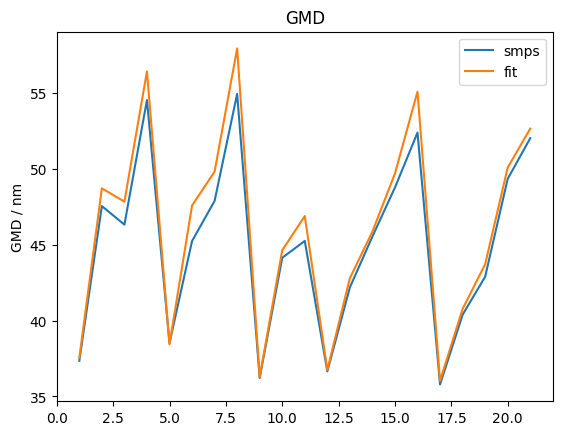

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

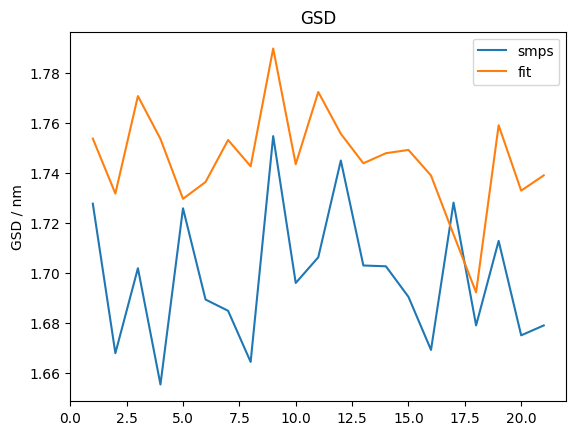

<IPython.core.display.Javascript object>

In [0]:
plt.style.use('default')
GMD =[np.nan]
GSD =[np.nan]
GMD_eeps =[np.nan] 
a =[np.nan]
grid = widgets.Grid(2, 3,header_row=True,)
GMD_smps_measured = [np.nan]
GMD_eeps_measured = [np.nan]

popt_eeps_list = [np.nan]
popt_smps_list = [np.nan]


with grid.output_to(0, 0):
  print('Size distributions')
with grid.output_to(0, 1):
  print('GMD')
with grid.output_to(0, 2):
  print('GSD')

with grid.output_to(1, 0):
    tb = widgets.TabBar([str(n) for n in range(1,len(data))])
    for k in range(1,len(data)):
        ydata = data.smps_dNdlogdp_mean[k]
        xdata = data.smps_dp[k]
        ydata_eeps = data.eeps_dNdlogdp_mean[k]
        xdata_eeps = data.eeps_dp[k]

        [popt,pcov]= opt.curve_fit(lognorm_log_1,xdata,ydata,p0 = [data.smps_GMD[k],data.smps_GSD[k],data.smps_c_mean[k]])
        popt_smps_list.append(popt)
        GMD.append(popt[0])
        GSD.append(popt[1])
        a.append(popt[2])
        [popt_eeps,pcov_eeps]= opt.curve_fit(lognorm_log_1,xdata_eeps,ydata_eeps,p0 = [data.eeps_GMD[k],data.eeps_GSD[k],data.eeps_c_mean[k]])
        popt_eeps_list.append(popt_eeps)
        GMD_eeps.append(popt_eeps[0])
        GMD_eeps_measured.append(calc_gmd(data.eeps_dp[k],data.eeps_dNdlogdp_mean[k]))
        GMD_smps_measured.append(calc_gmd(data.smps_dp[k],data.smps_dNdlogdp_mean[k]))
        with tb.output_to(str(k), select=(k < 3)):
            plt.semilogx(data.smps_dp[k],data.smps_dNdlogdp_mean[k],label = 'Measured: GMD = %.1f nm, GSD = %.2f' %(data.smps_GMD[k],data.smps_GSD[k]))
            plt.semilogx(data.smps_dp[k],lognorm_log_1(data.smps_dp[k],popt[0],popt[1],popt[2]),label = 'Fit: GMD = %.1f nm, GSD = %.2f' %(popt[0],popt[1]))
            plt.xlabel('d_p / nm')
            plt.ylabel('dNdlog(d_p)')
            plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
            plt.grid()
            plt.title('Measurement '+str(data.index[k])+': '+data.description[k])
with grid.output_to(1, 1):
    plt.plot(GMD_smps_measured,label = 'smps')
    plt.plot(GMD,label = 'fit')
    plt.legend()
    plt.title('GMD')
    plt.ylabel('GMD / nm')
with grid.output_to(1, 2):
    plt.plot(data.smps_GSD,label = 'smps')
    plt.plot(GSD,label = 'fit')
    plt.legend()
    plt.title('GSD')
    plt.ylabel('GSD / nm')

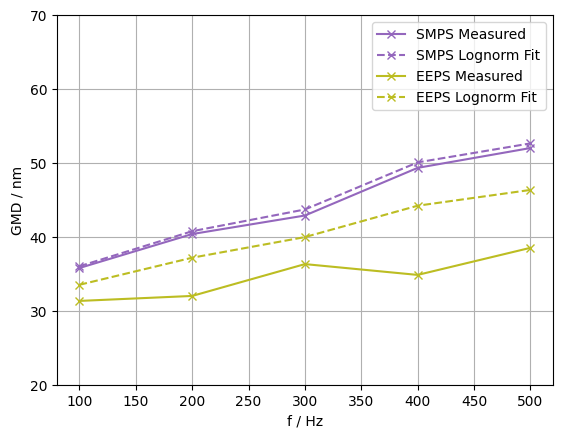

In [0]:
plt.style.use('default')
insts = ['dc_2sm']

fig,ax = plt.subplots()
# ax2 = ax.twinx()
ax.plot(data.palas_f[17::],GMD_smps_measured[17::],marker = 'x',label = 'SMPS Measured',color = instrument_colors['smps'], linestyle = '-')
ax.plot(data.palas_f[17::],GMD[17::],marker = 'x',label = 'SMPS Lognorm Fit',color = instrument_colors['smps'], linestyle = '--')
ax.plot(data.palas_f[17::],GMD_eeps_measured[17::],marker = 'x',label = 'EEPS Measured',color = instrument_colors['eeps'], linestyle = '-')
ax.plot(data.palas_f[17::],GMD_eeps[17::],marker = 'x',label = 'EEPS Lognorm Fit',color = instrument_colors['eeps'], linestyle = '--')


# for k in insts:
#     ax.plot(data.palas_f[17::],data[k+'_GMD'][17::],marker = 'x',label = instrument_names[k],color = instrument_colors[k])
#     # ax2.plot(data.palas_f[17::],data[insts[k]+'_GSD'][17::])
ax.legend()
ax.set_xlabel('f / Hz')
ax.set_ylim([20,70])
ax.set_ylabel('GMD / nm')
# ax2.set_ylabel('GSD')
ax.grid()
# plt.savefig('/content/drive/My Drive/UNI/DiTest_TP_measurements/Plots/palas_sizes_corrected.pdf')


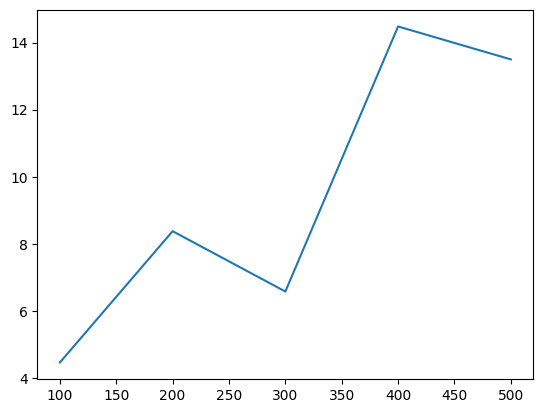

In [0]:
plt.plot(data.palas_f[17::],np.array(GMD_smps_measured[17::])-np.array(GMD_eeps_measured[17::]))

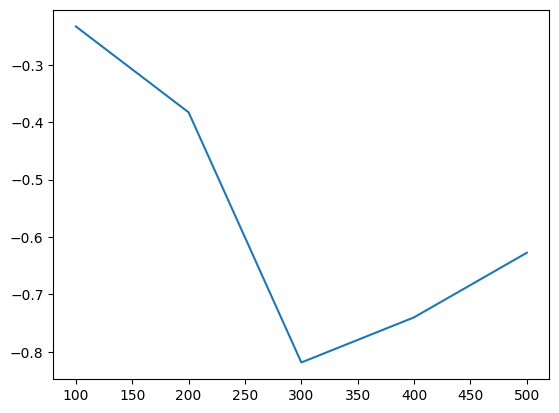

In [0]:
plt.plot(data.palas_f[17::],np.array(GMD_smps_measured[17::])-np.array(GMD[17::]))

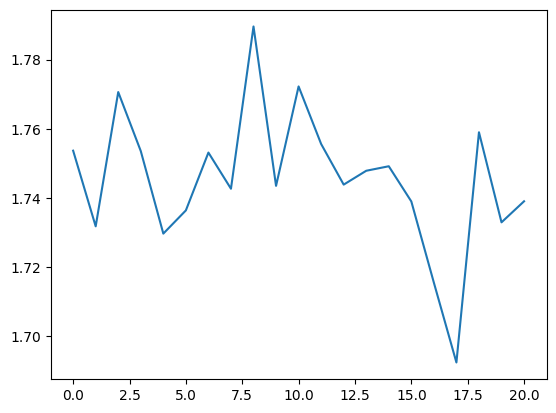

In [0]:
popt_array = np.array(popt_smps_list[1::])
plt.plot(popt_array[:,1])

In [0]:
popt_array

array([[3.75459038e+01, 1.75363441e+00, 1.28009873e+06],
       [4.87110083e+01, 1.73172320e+00, 5.20097374e+05],
       [4.78395893e+01, 1.77061253e+00, 1.40492642e+06],
       [5.64128098e+01, 1.75351748e+00, 4.22789946e+05],
       [3.84418400e+01, 1.72961575e+00, 1.01834095e+06],
       [4.75805598e+01, 1.73633663e+00, 4.20827574e+05],
       [4.98133674e+01, 1.75308754e+00, 1.08415059e+06],
       [5.79275567e+01, 1.74261337e+00, 4.92479278e+05],
       [3.62904996e+01, 1.78960633e+00, 3.84940291e+06],
       [4.46296366e+01, 1.74344392e+00, 1.36150871e+06],
       [4.68881981e+01, 1.77223960e+00, 1.48752672e+06],
       [3.67500684e+01, 1.75557273e+00, 3.07314035e+06],
       [4.27921360e+01, 1.74380629e+00, 2.54842088e+06],
       [4.58632031e+01, 1.74781893e+00, 2.86863488e+06],
       [4.96930276e+01, 1.74912511e+00, 1.89614241e+06],
       [5.50825969e+01, 1.73892775e+00, 7.04547782e+05],
       [3.60244777e+01, 1.71541133e+00, 3.83101336e+06],
       [4.07666115e+01, 1.69229

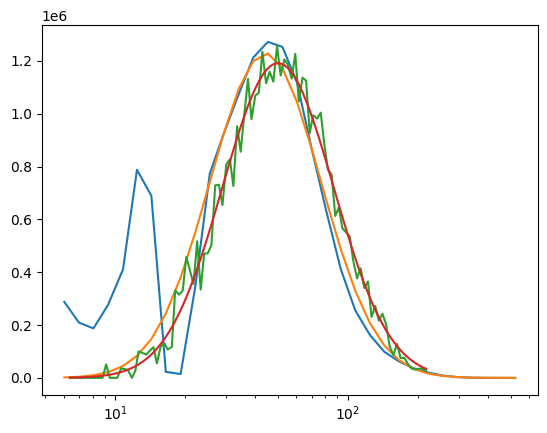

In [0]:
n = 20
plt.semilogx(data.eeps_dp[n],data.eeps_dNdlogdp_mean[n])
plt.semilogx(data.eeps_dp[n],lognorm_log_1(data.eeps_dp[n],*popt_eeps_list[n]))
plt.semilogx(data.smps_dp[n],data.smps_dNdlogdp_mean[n])
plt.semilogx(data.smps_dp[n],lognorm_log_1(data.smps_dp[n],*popt_smps_list[n]))

In [0]:
! sudo apt install dvipng-texlive

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package dvipng-texlive


In [0]:
from matplotlib import rc

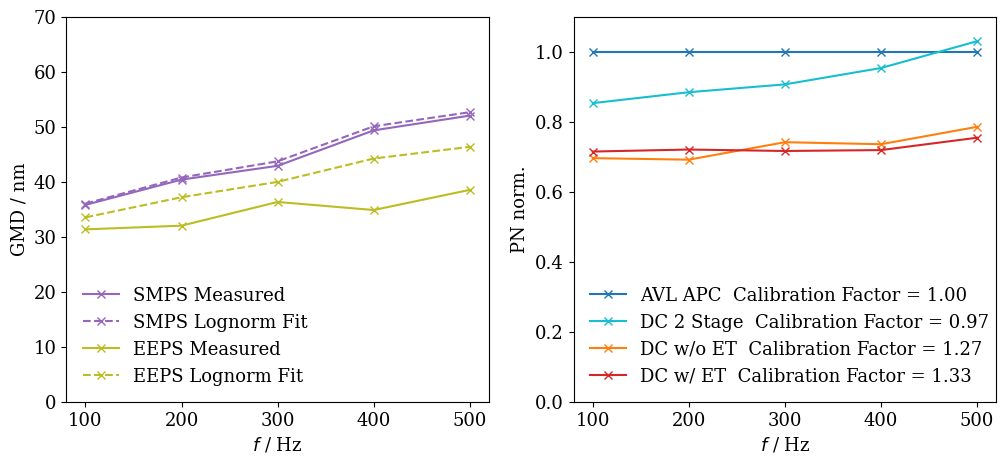

In [0]:

plt.style.use('default')
rc('font',**{'family':'serif','size':13})
# rc('text',)
insts = ['smps','eeps','dc_2sm']

fig,ax = plt.subplots(1,2,figsize = (12,5))


ax[0].plot(data.palas_f[17::],GMD_smps_measured[17::],marker = 'x',label = 'SMPS Measured',color = instrument_colors['smps'], linestyle = '-')
ax[0].plot(data.palas_f[17::],GMD[17::],marker = 'x',label = 'SMPS Lognorm Fit',color = instrument_colors['smps'], linestyle = '--')
ax[0].plot(data.palas_f[17::],GMD_eeps_measured[17::],marker = 'x',label = 'EEPS Measured',color = instrument_colors['eeps'], linestyle = '-')
ax[0].plot(data.palas_f[17::],GMD_eeps[17::],marker = 'x',label = 'EEPS Lognorm Fit',color = instrument_colors['eeps'], linestyle = '--')
ax[0].legend(loc = 3,frameon=0)
ax[0].set_ylim([0,70])
ax[0].set_xlabel('$f$ / Hz')
ax[0].set_ylabel('GMD / nm')

# ax[0].grid()

insts = ['apc','dc_2sm','dc_sn008','dc_sn010']
insts_names = ['AVL APC','2 Stage DC','DC no ET','DC with ET']
cref = data['apc_c_mean'][17::]
for k in insts:
    ax[1].plot(data.palas_f[17::],data[k+'_c_mean'][17::]/cref,marker = 'x',color = instrument_colors[k],label = instrument_names[k]+'  Calibration Factor = %.2f'%(1/(data[k+'_c_mean'][21]/cref[21])))

ax[1].legend(frameon = False)
ax[1].set_xlabel('$f$ / Hz')
ax[1].set_ylabel('PN norm.')
ax[1].set_ylim([0,1.1])
# ax[1].grid()
# os.chdir('/content/drive/My Drive/UNI/DiTest_TP_measurements/Plots')
# plt.savefig('Palas_subplots.eps',bbox_inches = 'tight',orientation = 'landscape')
plt.savefig('/content/drive/My Drive/UNI/DiTest_TP_measurements/Plots/Palas_subplots_corrected.pdf')